## K Means Clustering

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("income.csv")


df.rename(columns={"Income($)": "Income"}, inplace=True)
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


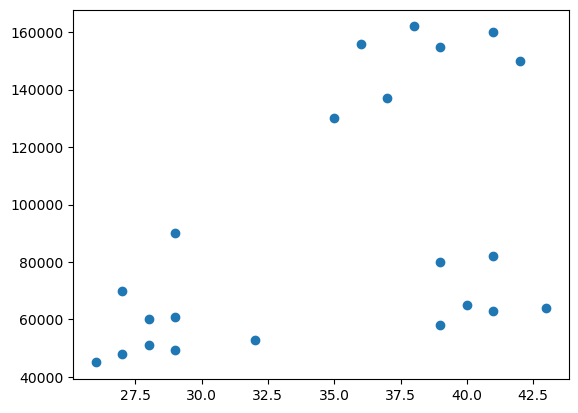

In [10]:
plt.scatter(df["Age"], df["Income"])
plt.show()

In [11]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [12]:
y_predicted = km.fit_predict(df[['Age', 'Income']])

y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [13]:
df['cluster'] = y_predicted

In [14]:
df.head()

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


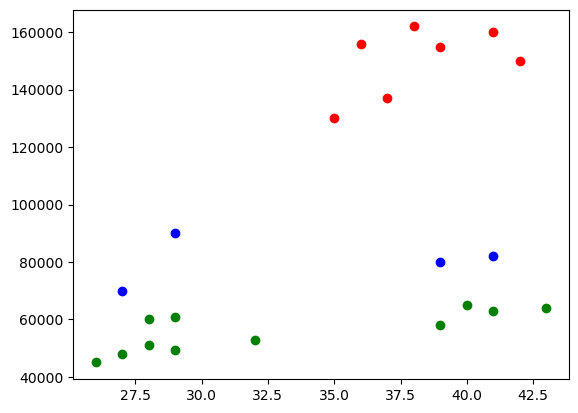

In [15]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1.Income, color="green")
plt.scatter(df2.Age, df2.Income, color="red")
plt.scatter(df3.Age, df3.Income, color="blue")

We need to scale our features, see Y is on a much larger scale than X.

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

In [21]:
scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])

In [22]:
y_predicted = km.fit_predict(df[['Age', 'Income']])

y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [23]:
df['cluster'] = y_predicted

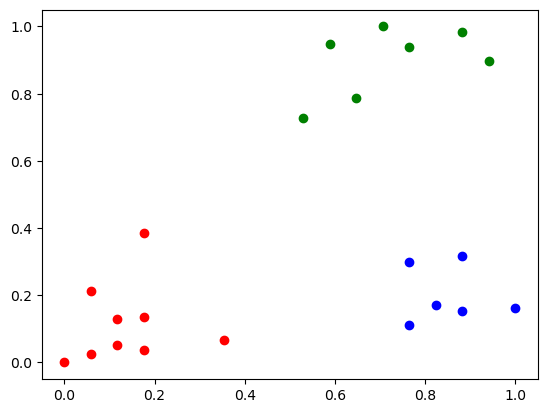

In [24]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1.Income, color="green")
plt.scatter(df2.Age, df2.Income, color="red")
plt.scatter(df3.Age, df3.Income, color="blue")

In [25]:
km.inertia_

0.4750783498553096